In [1]:
%pylab inline

Populating the interactive namespace from numpy and matplotlib


In [2]:
#import various modules we've been using

import scipy.stats as stats
import numpy.random as random
import scipy.interpolate as interpol
import scipy.integrate as integrate
from scipy.special import factorial

# Binomial distributions for small $p$

Let's plot the distribution of expected accidents in Pittsburgh per day, either calculating from the number of accidents per minute or per second.


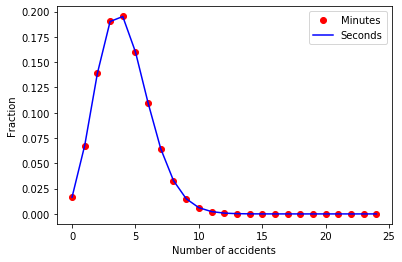

In [3]:
from scipy.special import comb,factorial

x=np.arange(25)

events_from_minutes=comb(1440,x)*2.85E-3**x*(1-2.85E-3)**(1440-x)

events_from_seconds=comb(86400,x)*4.75E-5**x*(1-4.75E-5)**(86400-x)
poisson=4.1**x * exp(-4.1)/factorial(x)

# provide the label= keyword to make curves show up in the legend
plt.plot(x,events_from_minutes,'ro',label='Minutes')
plt.plot(x,events_from_seconds,'b-',label='Seconds')

plt.xlabel('Number of accidents')
plt.ylabel('Fraction')

# cause the legend to be drawn
plt.legend()


# The Poisson distribution

The probability of k occurrences from a poisson distribution of mean $\lambda$ is given by $p(k) = {{\lambda^k \exp(-\lambda)} \over {k!}}$ .

__Using the below code box, plot Poisson distributions for $\lambda$ = 1, 4, and 10 and k ranging from 0 to 25; label all curves and add a legend.__  You may want to use `scipy.stats.poisson` for convenience; otherwise you will need to use the `factorial` function (imported at the top of the notebook).

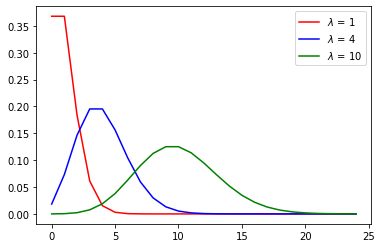

In [9]:
# Example: lambda = 1
k = np.arange(25)
# we shouldn't use lambda as a variable name as it is a Python keyword (which we will use later...)
lambdap=1.
plt.plot(k,lambdap**k*np.exp(-lambdap)/factorial(k),'r-',label=r'$\lambda$ = 1')
lambdap=4.
plt.plot(k,lambdap**k*np.exp(-lambdap)/factorial(k),'b-',label=r'$\lambda$ = 4')
lambdap=10.
plt.plot(k,lambdap**k*np.exp(-lambdap)/factorial(k),'g-',label=r'$\lambda$ = 10')
plt.legend()
#for different marker options see: https://matplotlib.org/api/markers_api.html



# Asymmetry of the Poisson distribution

We can never observe fewer than zero events.  As a result, the Poisson distribution is very asymmetric when $\lambda$ is small.  How low does $\lambda$ need to be for this to be a big issue?

Text(0, 0.5, 'Probability of zero events')

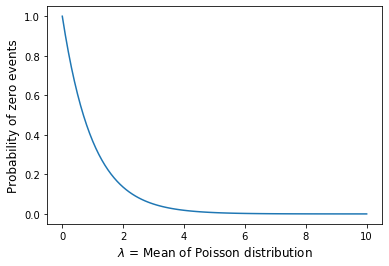

In [7]:

x=np.linspace(0.,10.,101)
plt.plot(x,x**0*exp(-x)/factorial(0))
plt.xlabel(r'$\lambda$ = Mean of Poisson distribution',size='large')
plt.ylabel('Probability of zero events',size='large')

# Try this code box with and without the following line commented out:
#plt.yscale('log')


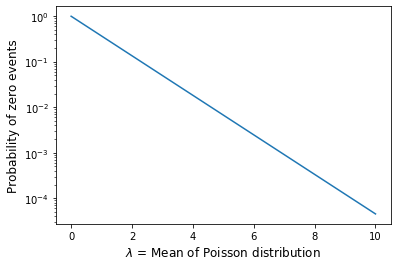

In [8]:

x=np.linspace(0.,10.,101)
plt.plot(x,x**0*exp(-x)/factorial(0))
plt.xlabel(r'$\lambda$ = Mean of Poisson distribution',size='large')
plt.ylabel('Probability of zero events',size='large')

# Try this code box with and without the following line commented out:
plt.yscale('log')

# Priors for the Poisson distribution

Jeffreys prior: $p(\lambda) \propto \lambda^{-1/2}$

The below code plots the likelihood & posterior for the Poisson parameter $\lambda$ if $N=1$ events are observed.  __Replot the curves for cases where N = 3, 5, or 10 events were seen (just modify the code, don't add more curves).__  
 
__Evaluate how both the peak of the likelihood and posterior correspond to the observed # of events, N, in each case (indicated via the dashed red curve).__

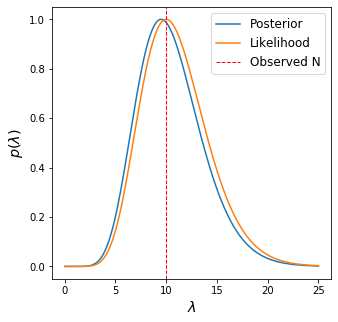

In [17]:
plt.figure(figsize=(5,5))

# set up an array of possible lambda values
lam_arr=np.linspace(0,25,251)+1.E-3

# this is the observed number of events
N=10

# Jeffreys prior: 1/sqrt(lambda)
likelihood = lam_arr**(N)*np.exp(-lam_arr)
posterior = lam_arr**(N-0.5)*np.exp(-lam_arr)


# Note: We are making the maximum 1 for convenience, but these are not being normalized into PDFs.
plt.plot(lam_arr,posterior/np.max(posterior),label='Posterior')
plt.plot(lam_arr,likelihood/np.max(likelihood),label='Likelihood')
plt.xlabel(r'$\lambda$',size='x-large')
plt.ylabel(r'$p(\lambda)$',size='x-large')

#draw a vertical line at N.  How do the peak of the likelihood and posterior compare to the observed # of events?
plt.axvline(N,color='red',ls='--',lw=1,label='Observed N')

plt.legend(fontsize='large')
plt.show()

# The Gaussian distribution

Let's explore what happens when we change parameters of the Gaussian distribution, 
$f(x) = {1 \over \sqrt{2 \pi \sigma^2}} e^{-(x-\mu)^2 \over 2\sigma^2}$.

  __Try changing mu to a few different values in the code below.__

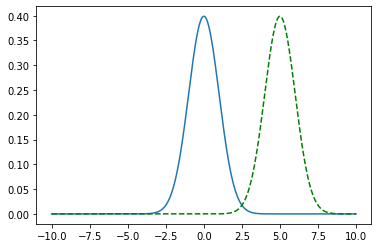

In [21]:
x=np.linspace(-10,10,20001)
mu=0.
sigma=1.
plt.plot(x,1/np.sqrt(2*np.pi*sigma**2)*exp(-(x-mu)**2/2./sigma**2))
mu=5
plt.plot(x,1/np.sqrt(2*np.pi*sigma**2)*exp(-(x-mu)**2/2./ sigma**2),'g--')

### Changing the value of sigma

__In the below code box, define variables y2, using sigma=2, and y0_2, using sigma=0.2; plot up all 3 curves (y1,y0_2,y2) together in the same plot.__

__Then try making the y axis logarithmic (how do we do that?)  and explain what you see.__



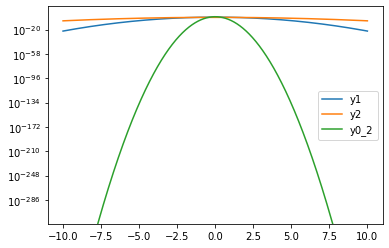

In [25]:
mu=0.
sigma=1.
y1=1/np.sqrt(2*np.pi*sigma**2)*exp(-(x-mu)**2/2./sigma**2)

mu=0.
sigma=2.
y2=1/np.sqrt(2*np.pi*sigma**2)*exp(-(x-mu)**2/2./sigma**2)

mu=0.
sigma=0.2
y0_2=1/np.sqrt(2*np.pi*sigma**2)*exp(-(x-mu)**2/2./sigma**2)

plt.plot(x, y1, label = "y1")
plt.plot(x, y2, label = "y2")
plt.plot(x, y0_2, label = "y0_2")
plt.yscale('log')
plt.legend()
plt.show()

## Testing Gaussian integrals

We expect probability 0.68268949 for being between -1 sigma to +1 sigma, probability 0.95449974 between -2 sigma and +2 sigma.  __Do we find the same from numerical integration?__  

In [26]:
x=np.linspace(-25,25,501)
mu=0.
sigma=1.
y1=1/np.sqrt(2*np.pi*sigma**2)*exp(-(x-mu)**2/2./sigma**2)

interp_1=interpol.interp1d(x,y1,kind='cubic') 

print(f'integrals for standard Gaussian: \
 {integrate.quad(interp_1,-1.,1.,epsrel=1.e-4)[0]:.8f}, \
 {integrate.quad(interp_1,-2.,2.,epsrel=1.e-4)[0]:.8f}')

mu=0.
sigma=10.
y10=1/np.sqrt(2*np.pi*sigma**2)*exp(-(x-mu)**2/2./sigma**2)

interp_10=interpol.interp1d(x,y10,kind='cubic') 

print(f'integrals for sigma=10 Gaussian: \
 {integrate.quad(interp_10,-10.,10.,epsrel=1.e-4)[0]:.8f}, \
 {integrate.quad(interp_10,-20.,20.,epsrel=1.e-4)[0]:.8f}')

print('Expected values:                  0.68268949,  0.95449974')

integrals for standard Gaussian:  0.68268935,  0.95449999
integrals for sigma=10 Gaussian:  0.68268949,  0.95449974
Expected values:                  0.68268949,  0.95449974


## Generating Gaussian random variables 

We can generate Gaussian random variables with mean 0 and sigma 1 using the function `numpy.random.randn()`, which works just like `numpy.random.rand()`.

__Repeatedly execute the following code, and see how your histograms change.__


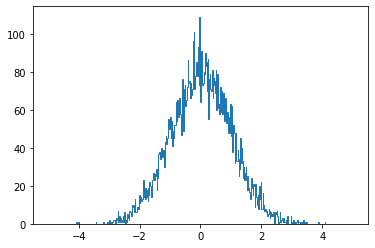

In [31]:
import numpy.random as random
bin_array=np.linspace(-5.,5.,501)
nrandom=int(1E4)
n,bins,patches=plt.hist(random.randn(nrandom),bins=bin_array,histtype='step') 


__In the below code box, make a histogram from Gaussian random data drawn from the distribution N(5,$5^2$) (i.e, with mu=5 and sigma=5).__  Recall that since the center shifts with $\mu$ and the width is proportional to $\sigma$, we can get numbers distributed as $N(\mu,\sigma^2)$ by transforming random values from the standard normal distribution. I.e. we generate a value $x'$ from $N(\mu,\sigma^2)$ by 

$x'= \sigma x + \mu$,

where $x$ is a random variable distributed as $N(0,1)$.



In [ ]:
x = random.randn(nrandom)
x_p = x*5 + 5

n,bins,patches=plt.hist(x_p,bins=bin_array,histtype='step') 

# Bayesian Analysis of Gaussian data

Suppose we have some measured value for x, where we expect x to come from a Gaussian of some unknown $\mu$, but with known $\sigma=2$, i.e., N($\mu$,2$^2$).

__What is the posterior for $\mu$ given a single measurement (say, x=5), using the Jeffreys prior prob($\mu$) = 1?__  Fill in the missing pieces below!!!

Reminder: the formula for a Gaussian is $f(x) = { 1 \over {\sqrt{2 \pi \sigma^2}}} {\rm exp}(-{ {(x-\mu)^2} \over {2 \sigma^2}})$.

In [ ]:
x=5
sigma=2.

mu=np.linspace(-10.,10.,201)

# Fill in the likelihood below: what is p(x | mu)? 
likelihood = ???

# Fill in the prior; we want a uniform prior, same size as the mu array, with value 1 everywhere
prior= ???    
plt.plot(mu,likelihood,label='Likelihood')
plt.plot(mu,likelihood*prior,label='Posterior')
plt.legend()


# Bayesian Analysis for $\sigma$

- Now suppose we have some measured value for x, where we expect x to come from a Gaussian of known mean $\mu=0$, but with unknown $\sigma$.

- __What is the likelihood for $\sigma$ and posterior for $\sigma$ given a single measurement (say, x=5), with prior prob($\sigma$) = 1/$\sigma$?__

  
__This time, be sure to normalize the posterior distribution to have integral 1.__  Recall that we used `interpol.interp1d` and `scipy.integrate.quad` for integration before.


In [ ]:
x=5
mu=0.
sigma=np.linspace(0.,50.,501)+1.E-3 # want to avoid dividing 1/0
likelihood=???
prior = ???
norm = ???

plt.plot(sigma,likelihood,label='Likelihood') 
plt.plot(sigma,likelihood*prior/norm,label='Posterior')
plt.legend()


# If you have extra time

__Calculate the likelihood and Bayesian posterior for the variance $V = \sigma^2$.  Normalize your curves to peak at 1.__  The Jeffreys prior for variance of a Gaussian is $p(V)=1/V$.  How does your estimate for V compare to your estimate for $\sigma$?